In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




In [ ]:
## Load data
df = pd.read_csv("/content/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
## Basic cleaning: Remove duplicates and nulls
df = df.drop_duplicates().dropna()

In [ ]:
# Outlier treatment for BMI and charges
def cap_outliers(series, lower_percentile=0.01, upper_percentile=0.99):
    lower = series.quantile(lower_percentile)
    upper = series.quantile(upper_percentile)
    return series.clip(lower, upper)

In [ ]:
df['bmi'] = cap_outliers(df['bmi'])
df['charges'] = cap_outliers(df['charges'])

In [ ]:
# Encode categorical features
le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Prepare features and target
X = df[['age', 'bmi', 'smoker', 'region', 'children', 'sex']]
y = df['charges']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Models dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)}

In [ ]:
# Model Training & Evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    results[name] = {'R2': r2, 'RMSE': rmse}
    print(f"{name}: R2 = {r2:.2f}, RMSE = {rmse:.2f}")

Linear Regression: R2 = 0.82, RMSE = 5553.50
Random Forest: R2 = 0.89, RMSE = 4327.07
Gradient Boosting: R2 = 0.91, RMSE = 3882.50


In [ ]:
# Feature importance for best model (e.g., Random Forest)
best_model = models['Random Forest']
importances = best_model.feature_importances_
feature_names = X.columns
fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
fi_df = fi_df.sort_values('importance', ascending=False)
print('\nFeature Importances:')
print(fi_df)


Feature Importances:
    feature  importance
2    smoker    0.603319
1       bmi    0.213950
0       age    0.136442
4  children    0.023327
3    region    0.015758
5       sex    0.007203


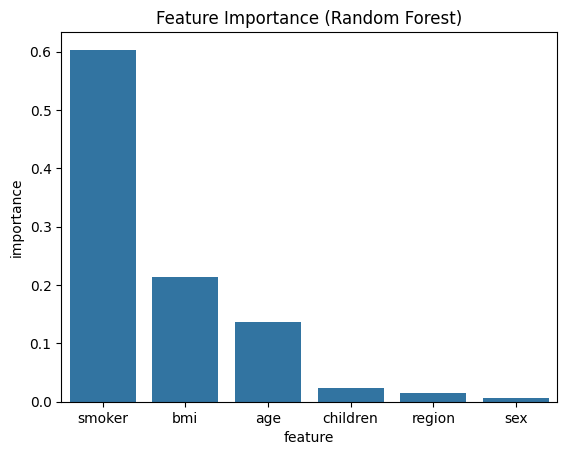

In [ ]:
# Plotting Feature Importances
sns.barplot(y='importance', x='feature', data=fi_df)
plt.title('Feature Importance (Random Forest)')
plt.show()
